# Neural Networks (Deep Learning)
A family of algorithms known as neural networks has recently seen a revival under
the name “deep learning.” While deep learning shows great promise in many machine
learning applications, deep learning algorithms are often tailored very carefully to a
specific use case. Here, we will only discuss some relatively simple methods, namely
multilayer perceptrons for classification and regression, that can serve as a starting
point for more involved deep learning methods. Multilayer perceptrons (MLPs) are
also known as (vanilla) feed-forward neural networks, or sometimes just neural
networks.  
## The neural network model
MLPs can be viewed as generalizations of linear models that perform multiple stages
of processing to come to a decision.

In [42]:
from sklearn.neural_network import MLPClassifier
import mglearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [6]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X[:5]

array([[ 1.87756309,  0.56839425],
       [ 0.36877983, -0.34894509],
       [ 0.96515318,  0.10921819],
       [ 0.48599685,  0.20291313],
       [ 1.72532644,  0.53367598]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)

Text(0, 0.5, 'Feature 1')

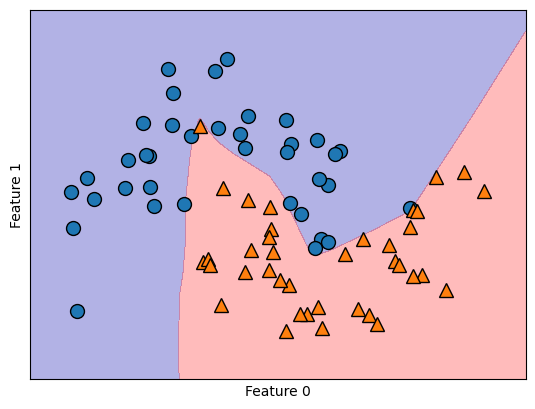

In [23]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

As you can see, the neural network learned a very nonlinear but relatively smooth
decision boundary. We used algorithm='l-bfgs'

By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset.
We can reduce the number (which reduces the complexity of the model) and still get
a good result

Text(0, 0.5, 'Feature 1')

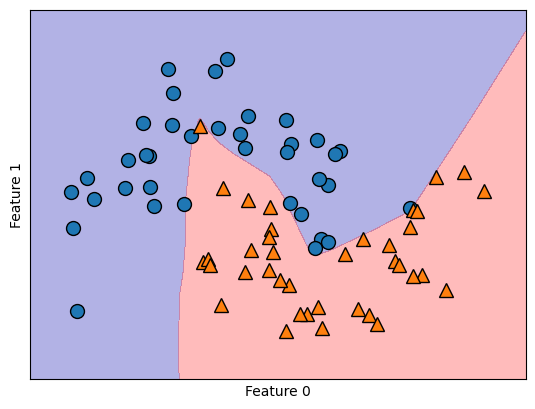

In [26]:
mpl = MLPClassifier(solver='lbfg',random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

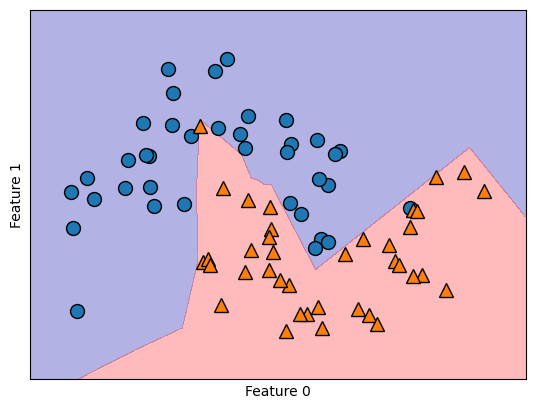

In [28]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

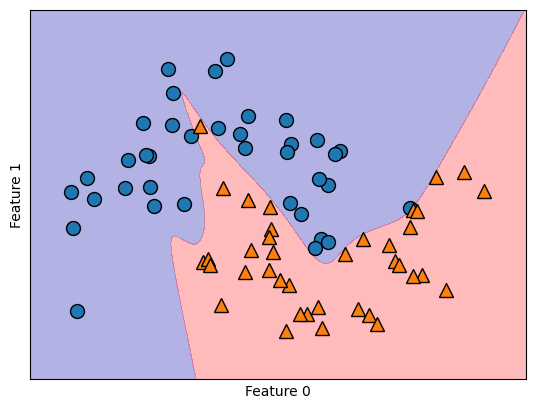

In [30]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Finally, we can also control the complexity of a neural network by using an l2 penalty
to shrink the weights toward zero, as we did in ridge regression and the linear classifi‐
ers. The parameter for this in the MLPClassifier is alpha (as in the linear regression
models), and it’s set to a very low value (little regularization) by default. Figure below
shows the effect of different values of alpha on the two_moons dataset, using two hid‐
den layers of 10 or 100 units each:

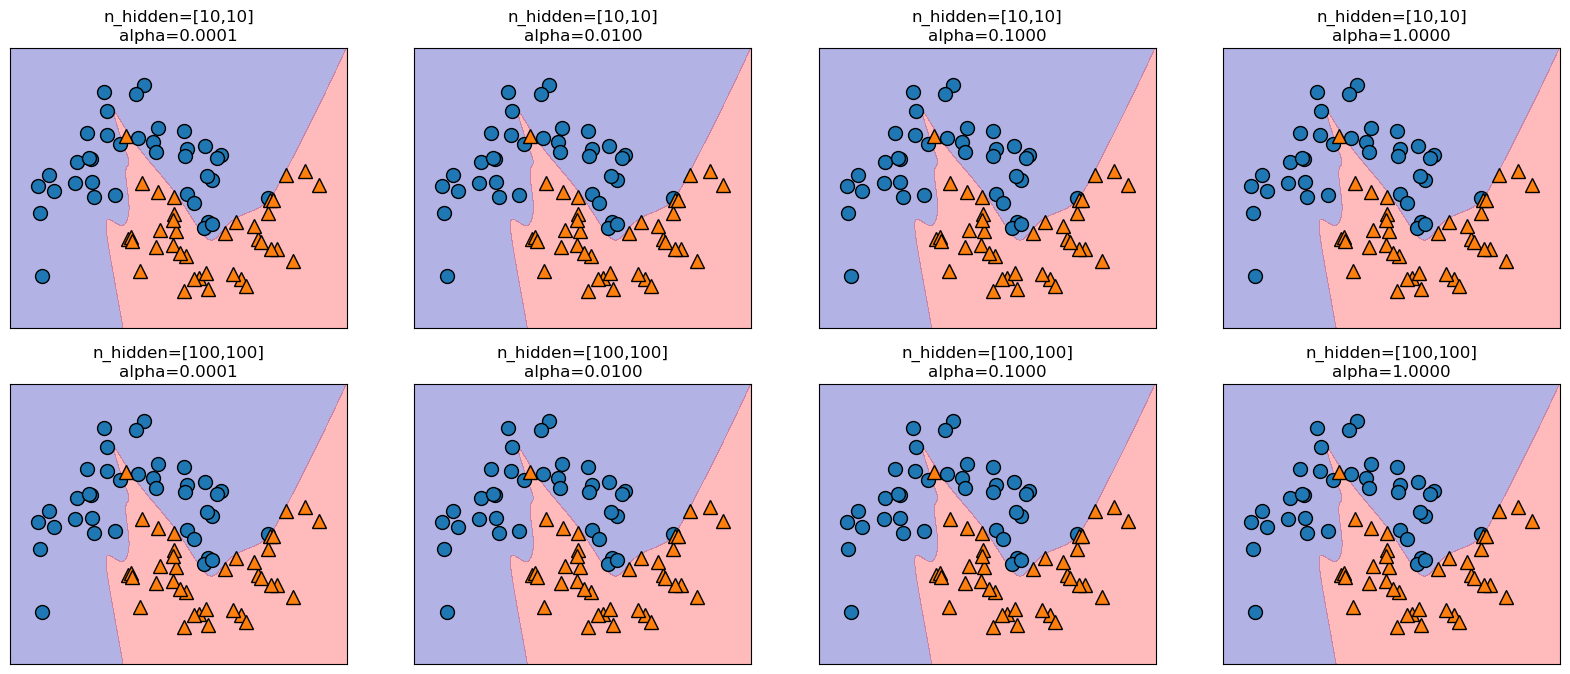

In [34]:
fig,axes= plt.subplots(2,4,figsize=(20,8))
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mpl=MLPClassifier(solver='lbfg',random_state=0,
                     hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],
                     alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(
        n_hidden_nodes,n_hidden_nodes,alpha))

As you probably have realized by now, there are many ways to control the complexity
of a neural network: the number of hidden layers, the number of units in each hidden
layer, and the regularization (alpha). There are actually even more, which we won’t
go into here.
An important property of neural networks is that their weights are set randomly
before learning is started, and this random initialization affects the model that is
learned. That means that even when using exactly the same parameters, we can
obtain very different models when using different random seeds. If the networks are
large, and their complexity is chosen properly, this should not affect accuracy too
much, but it is worth keeping in mind (particularly for smaller networks).
Figure below shows plots of several models, all learned with the same settings of the
parameters:

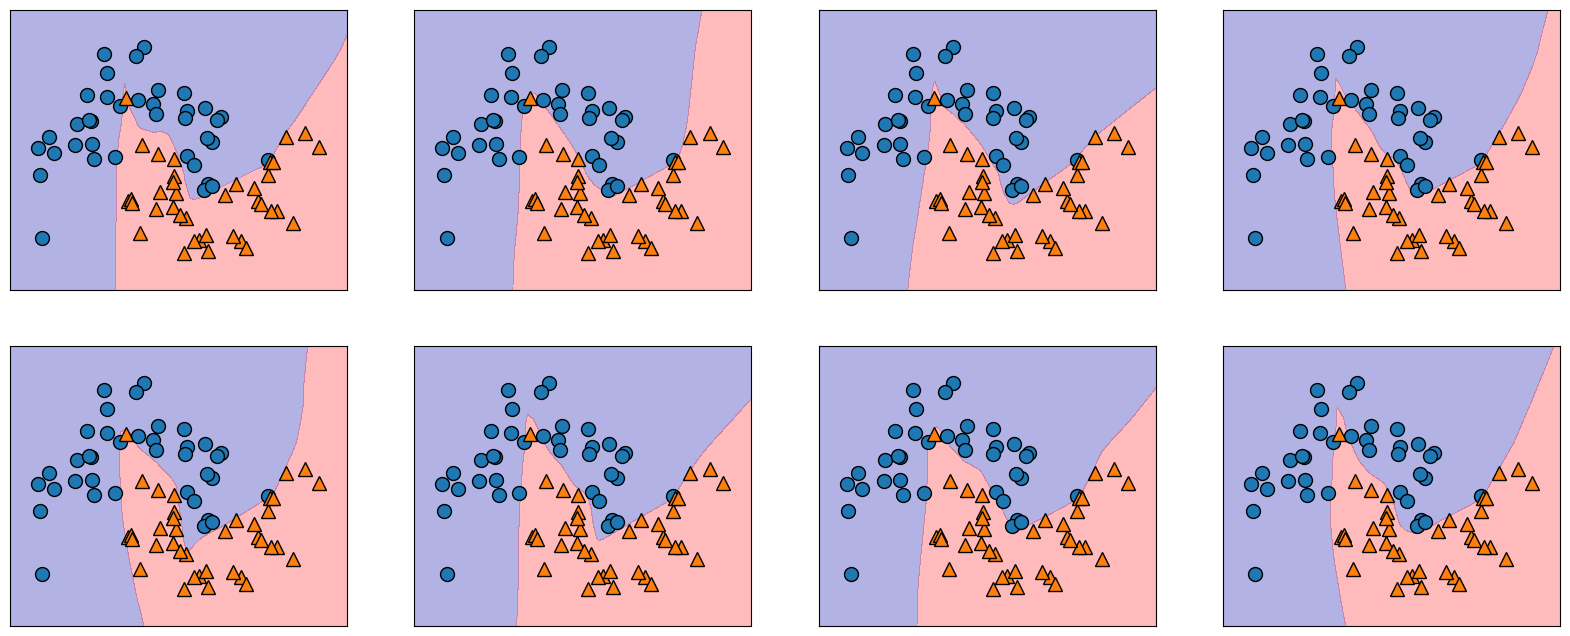

In [35]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
    hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [36]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
breast_cancer = load_breast_cancer()

# The data (features)
X = breast_cancer.data

# The labels
y = breast_cancer.target

# Feature names
feature_names = breast_cancer.feature_names

# Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)

# Display the first few rows of the DataFrame
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
y[:5]

array([0, 0, 0, 0, 0])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, random_state=0)

In [40]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


The accuracy of the MLP is quite good, but not as good as the other models. As in the
earlier SVC example, this is likely due to scaling of the data. Neural networks also
expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements. Again,
we will do this by hand here,

In [45]:
mean_on_train= X_train.mean(axis=0)
std_on_train= X_train.std(axis=0)
X_train_scaled= (X_train-mean_on_train)/std_on_train
mean_on_test=X_test.mean(axis=0)
std_on_test=X_test.std(axis=0)
X_test_scaled=(X_test-mean_on_test)/std_on_test
mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


Accuracy on training set: 0.991
Accuracy on test set: 0.951


C:\Users\city computers\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The results are much better after scaling, and already quite competitive. We got a
warning from the model, though, that tells us that the maximum number of iterations
has been reached. This is part of the adam algorithm for learning the model, and tells
us that we should increase the number of iterations:

In [46]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.951


Increasing the number of iterations only increased the training set performance, not
the generalization performance. Still, the model is performing quite well. As there is
some gap between the training and the test performance, we might try to decrease the
model’s complexity to get better generalization performance. Here, we choose to
increase the alpha parameter (quite aggressively, from 0.0001 to 1) to add stronger
regularization of the weights:

In [47]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


This leads to a performance on par with the best models so far.

While it is possible to analyze what a neural network has learned, this is usually much
trickier than analyzing a linear model or a tree-based model. One way to introspect
what was learned is to look at the weights in the model. You can see an example of
this in the scikit-learn example gallery. For the Breast Cancer dataset, this might
be a bit hard to understand. The following plot (Figure 2-54) shows the weights that
were learned connecting the input to the first hidden layer. The rows in this plot cor‐
respond to the 30 input features, while the columns correspond to the 100 hidden
units. Light colors represent large positive values, while dark colors represent nega‐
tive values:

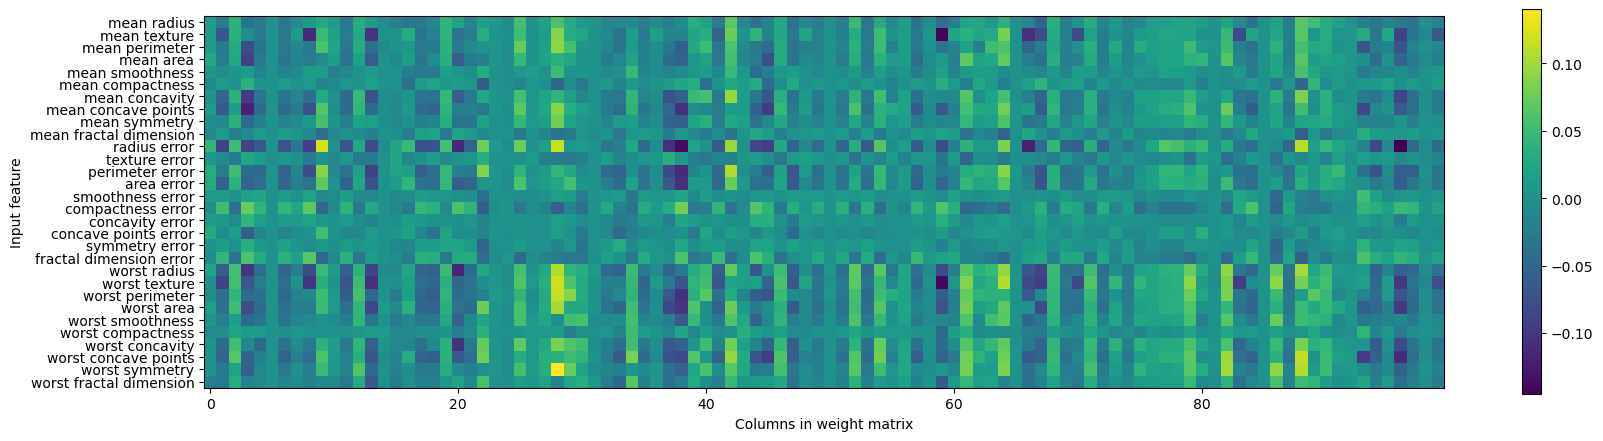

In [49]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), breast_cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

One possible inference we can make is that features that have very small weights for
all of the hidden units are “less important” to the model. We can see that “mean
smoothness” and “mean compactness,” in addition to the features found between
“smoothness error” and “fractal dimension error,” have relatively low weights com‐
pared to other features. This could mean that these are less important features or pos‐
sibly that we didn’t represent them in a way that the neural network could use.
We could also visualize the weights connecting the hidden layer to the output layer,
but those are even harder to interpret.
While the MLPClassifier and MLPRegressor provide easy-to-use interfaces for the
most common neural network architectures, they only capture a small subset of what
is possible with neural networks. If you are interested in working with more flexible
or larger models, we encourage you to look beyond scikit-learn into the fantastic
deep learning libraries that are out there. For Python users, the most well-established
are keras, lasagna, and tensor-flow. lasagna builds on the theano library, while
keras can use either tensor-flow or theano. These libraries provide a much more
flexible interface to build neural networks and track the rapid progress in deep learn‐
ing research. All of the popular deep learning libraries also allow the use of highperformance graphics processing units (GPUs), which scikit-learn does not
support. Using GPUs allows us to accelerate computations by factors of 10x to 100x,
and they are essential for applying deep learning methods to large-scale datasets.

# Strengths
Neural networks have reemerged as state-of-the-art models in many applications of
machine learning. One of their main advantages is that they are able to capture infor‐
mation contained in large amounts of data and build incredibly complex models.
Given enough computation time, data, and careful tuning of the parameters, neural
networks often beat other machine learning algorithms (for classification and regres‐
sion tasks).